In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-2-a2809eafaf74>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_outliers['Outlier_Column'] = feature
<ipython-input-2-a2809eafaf74>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_outliers['Outlier_Column'] = feature
<ipython-input-2-a2809eafaf74>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

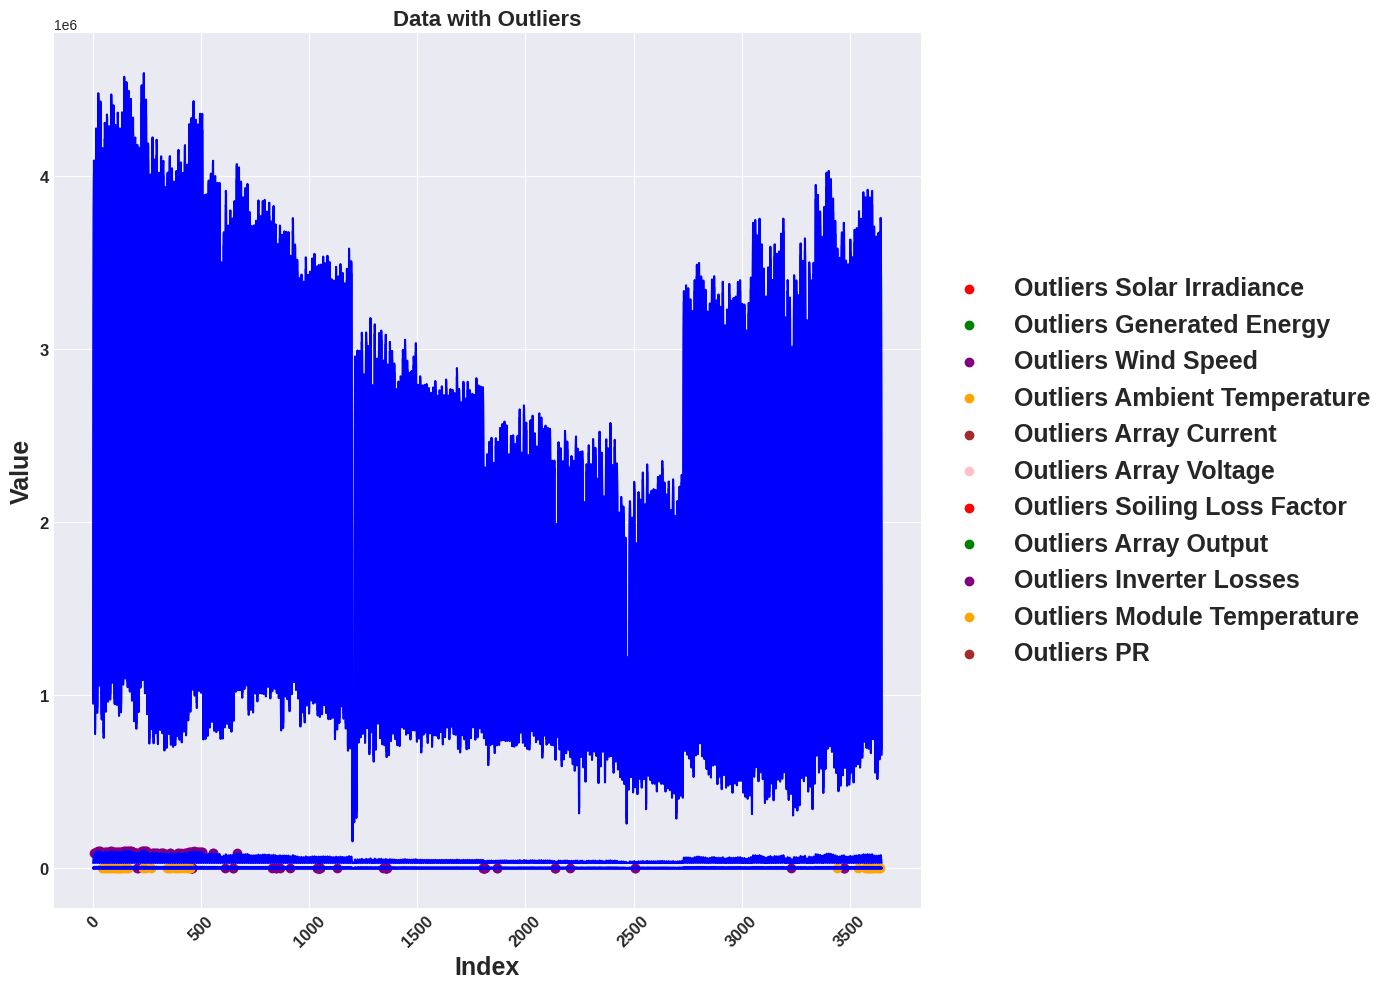

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path of your Excel file
file_path = "/content/drive/MyDrive/Dataset with all inputs for XAI model.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Function for IQR outlier detection
def detect_outliers_iqr(df, features):
    outliers = pd.DataFrame()

    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        feature_outliers['Outlier_Column'] = feature
        outliers = pd.concat([outliers, feature_outliers], axis=0)

    return outliers

# List of columns to check for outliers (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Detect outliers
outliers_df = detect_outliers_iqr(df, numeric_columns)

# Prepare data for plotting
x_col = df.index  # Use index as x-axis
y_cols = numeric_columns  # Using all numeric columns for y-axis

# Define colors for data points and outliers
data_color = 'blue'
outlier_colors = ['red', 'green', 'purple', 'orange', 'brown', 'pink']  # Add more colors if needed

# Plotting
plt.figure(figsize=(14, 10))
plt.style.use('seaborn-darkgrid')  # Using a different style

# Plot all data points in light blue
for col in y_cols:
    plt.plot(x_col, df[col], label='_nolegend_', color=data_color)

# Mark outliers with different colors for each column
for i, col in enumerate(y_cols):
    outliers_col = outliers_df[outliers_df['Outlier_Column'] == col]
    plt.scatter(outliers_col.index, outliers_col[col], color=outlier_colors[i % len(outlier_colors)], label='Outliers ' + col)

# Create a legend with 'Outliers' for each input column
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 18, 'weight': 'bold'})

plt.title('Data with Outliers', fontsize=16, fontweight='bold')
plt.xlabel('Index', fontsize=18, fontweight='bold')
plt.ylabel('Value', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()
